# Why We Need Random Forest

Last time we practiced Decision Trees. From class we know decision trees have a overfitting and variance problem. We offer a new method that will solve problems and limitations of Decision Trees: **Random Forest**. As the name suggests, **Random Forest** includes Decision Trees and based on random subset of features with bootstrapping approach.

Like decision tree, **Random Forest** is *supervised* machine learning algorithms which can be used for both *classification* and *regression* problems. The model we create is *Decision Trees* based;we run many Decision Trees independently and aggregates the outputs with voting based approach(Bagging).


While offering a solution to Decision Tree limitations, Random Forest lose the interpretability of decision trees which we will see in examples.

Today, we will have examples from both classification and regression problems with Decision Trees.

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive/"

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

# Let's Try Classification with Random Forest

Last time we have done Decision Tree classification using Titanic survival dataset. To be able to understand the difference let's do similar experiment for both Decision Tree Classifier and Random Forest Classifier.

Problem is multinomial classification. The aim is to predict the handwritten digit from 0 to 9.

For our data, preprocessing and classifier we will use Scikit-Learn library.

It is one of the, if not the, most used Python library for ML tasks. You can visits its website [here](https://scikit-learn.org/stable/).

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

#Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25,
                                                random_state=42)

In [4]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Decision Tree Training
model_dt = tree.DecisionTreeClassifier(random_state=42) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

#Random Forest Training(In new version default of estimators will be 100)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

We specified the random_state to 42 so that as everybody doing the example we get same results. Also for Random Forest we made n_estimators 100 since in the updated model default n_estimators will be 100. Other than these we did not specify any parameters when we build our decision tree or Random Forest but the model has many parameters. Let's go to the [documentation page](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) of the Random Forest in scikit-learn and see what those are.

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

#Decision Tree Testing
dt_predictions = model_dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)

rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:"+str(dt_acc))
print("Random Forest Accuracy:"+str(rf_acc))


Decision Tree Accuracy:0.8577777777777778
Random Forest Accuracy:0.9711111111111111


We can easily see that Random Forest outperforms Decision Tree. Now let's try to prove another point.
Suppose we want to avoid overfitting in general and decide to use max_depth as 2 in decision tree and adjust random forest also.

In [6]:
#Decision Tree Training with max_depth=2
model_dt = tree.DecisionTreeClassifier(max_depth=2) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

#Random Forest Training(In new version default of estimators will be 100) with max_depth=2
model_rf = RandomForestClassifier(n_estimators=100,max_depth=2)
model_rf.fit(X_train, y_train,)

#Decision Tree Testing with max_depth=2
dt_predictions = model_dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)

#Random Forest Testing with max_depth=2
rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)


print("Decision Tree Train Accuracy:"+str(accuracy_score(y_train, model_dt.predict(X_train))))
print("Random Forest Train Accuracy:"+str(accuracy_score(y_train, model_rf.predict(X_train))))

print("Decision Tree Test Accuracy:"+str(dt_acc))
print("Random Forest Test Accuracy:"+str(rf_acc))

Decision Tree Train Accuracy:0.3110616184112843
Random Forest Train Accuracy:0.8366740905716407
Decision Tree Test Accuracy:0.26222222222222225
Random Forest Test Accuracy:0.8444444444444444


It clearly shows that when we try to avoid overfitting by reducing variance(depth) in decision tree in decision tree, the accuracy will suffer. On the other hand, since we have 100 random trees in random forest, impact to this model will be less than Decision Tree.

To understand our result better let's look at **confusion matrix** colors.

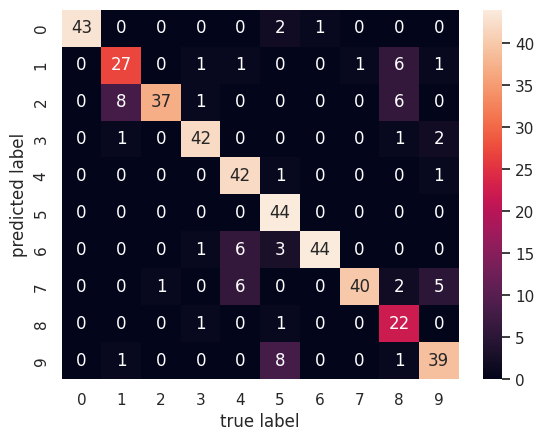

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
mat = confusion_matrix(y_test, rf_predictions)
sns.heatmap(mat.T, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');

## Which features were the most effective?

In [8]:
#Assume pixels are our features. Model has 8x8=64 features. Create a list with length 64 where each element stands for one pixel.
feature_list = list(range(digits.data.shape[1]))

# Get importance list from model
importances = list(model_rf.feature_importances_)

# Create list of tuples by combining(zip) feature list and and importance list
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort features by importance
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print top 5 features
for pair in feature_importances[:5]:
  print("Variable: {:2}   Importance: {}".format(*pair))

Variable: 36   Importance: 0.1
Variable: 21   Importance: 0.08
Variable: 30   Importance: 0.06
Variable: 38   Importance: 0.06
Variable: 42   Importance: 0.06


##How to Visualize

Alternatively, if we want to have a close look on some trees to understand the concept we can use the codes below.

In [9]:
from sklearn.tree import export_graphviz
import pydot

tree_number = 3
feature_list = list(range(digits.data.shape[1]))

#Get a tree with tree_number
tree = model_rf.estimators_[tree_number]

# Export graph to dot file, create graph and export png file
export_graphviz(tree, out_file='tree.dot', feature_names=feature_list, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png(join(path_prefix, 'tree.png'))

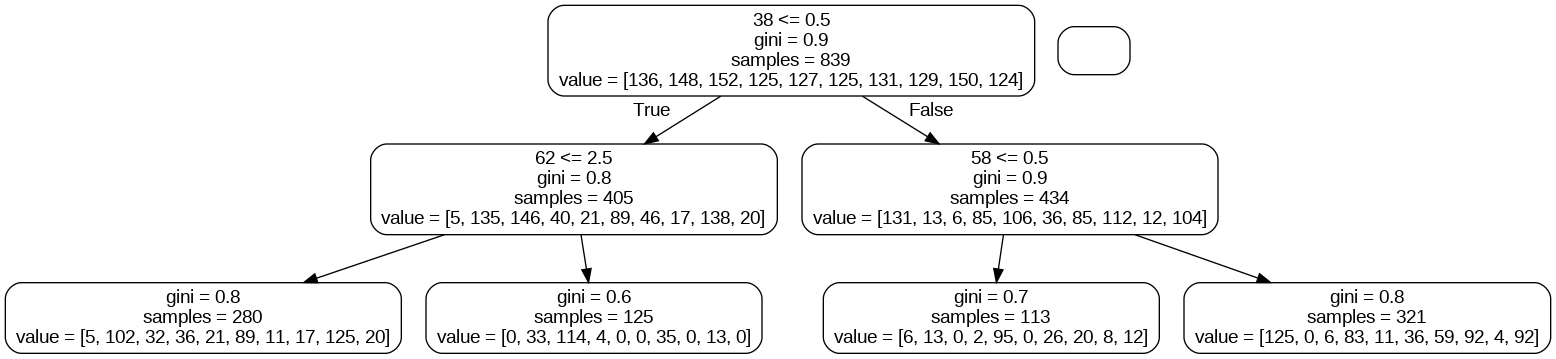

In [10]:
from IPython.display import Image
Image(join(path_prefix, 'tree.png'))